In [1]:
# ignore, used to have matching df and images

# path_images = '/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/images/images_v2/'
# files = os.listdir(path_images)

# files_title_only = [f.replace('.jpg', '') for f in files]

# updated_bumbulb_df = bumbulb_images[bumbulb_images.image_title.isin(files_title_only)]

# updated_bumbulb_df.to_csv('~/code/Clement-CL/bumbulb/data/bumbulb_img_v2.csv', index=False)

In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow
import os 
from PIL import Image
import glob

from sklearn.model_selection import train_test_split

# to add ?

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
augmented_csv_df = pd.read_csv('/Users/clementchausserie-lapree/code/Clement-CL/bulber/data/image_augmented.csv')

In [25]:
augmented_csv_df

,Unnamed: 0,augmented_species,augmented_images
0,0,Nymphaea alba,Nymphaea alba_flower_img_592_0_2171.jpg
1,1,Crocosmia x crocosmiiflora,Crocosmia x crocosmiiflora_flower_img_275_0_60...
2,2,Crocosmia x crocosmiiflora,Crocosmia x crocosmiiflora_flower_img_1483_0_3...
3,3,Carpobrotus edulis,Carpobrotus edulis_flower_img_1133_0_5560.jpg
4,4,Alisma plantago-aquatica,Alisma plantago-aquatica_leaf_img_95_0_50.jpg
...,...,...,...
49721,49721,Argentina anserina,Argentina anserina_leaf_img_657_0_9906.jpg
49722,49722,Begonia evansiana,Begonia evansiana_flower_img_149_0_5408.jpg
49723,49723,Carpobrotus edulis,Carpobrotus edulis_flower_img_1220_0_3564.jpg
49724,49724,Eucalyptus globulus,Eucalyptus globulus_leaf_img_210_0_9310.jpg


In [26]:
augmented_csv_df = augmented_csv_df.loc[augmented_csv_df['augmented_images'].str.contains('img') == True]

In [27]:
len(augmented_csv_df)

49725

In [28]:
augmented_csv_df.loc[augmented_csv_df['augmented_images'].str.contains('img') == False]

,Unnamed: 0,augmented_species,augmented_images


In [18]:
new_df

,Unnamed: 0,augmented_species,augmented_images
0,0,Nymphaea alba,Nymphaea alba_flower_img_592_0_2171.jpg
1,1,Crocosmia x crocosmiiflora,Crocosmia x crocosmiiflora_flower_img_275_0_60...
2,2,Crocosmia x crocosmiiflora,Crocosmia x crocosmiiflora_flower_img_1483_0_3...
3,3,Carpobrotus edulis,Carpobrotus edulis_flower_img_1133_0_5560.jpg
4,4,Alisma plantago-aquatica,Alisma plantago-aquatica_leaf_img_95_0_50.jpg
...,...,...,...
49721,49721,Argentina anserina,Argentina anserina_leaf_img_657_0_9906.jpg
49722,49722,Begonia evansiana,Begonia evansiana_flower_img_149_0_5408.jpg
49723,49723,Carpobrotus edulis,Carpobrotus edulis_flower_img_1220_0_3564.jpg
49724,49724,Eucalyptus globulus,Eucalyptus globulus_leaf_img_210_0_9310.jpg


In [2]:
%matplotlib inline

# Download csv

In [3]:
pic = Image.open('/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/images/images_v2/Brugmansia suaveolens_leaf_img_146.jpg')

In [4]:
np.array(pic).shape

(150, 150, 3)

In [5]:
bumbulb_images = pd.read_csv('/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/bumbulb_img_v2.csv')

In [6]:
len(bumbulb_images)

62037

In [7]:
bumbulb_images.head()

,family,genus,species,angle,image_url,image_title
0,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/978e3d2fbd442...,Acanthus mollis_flower_img_1
1,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/4d395bba95a16...,Acanthus mollis_flower_img_2
2,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/c3574b6ac407b...,Acanthus mollis_flower_img_3
3,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/781bb2a2b3eab...,Acanthus mollis_flower_img_4
4,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/f27971f9f316a...,Acanthus mollis_flower_img_5


# build X and y

In [8]:
X_list = []
Y_list = []

In [9]:
for index, rows in bumbulb_images.iterrows():
    pic_in_iter = np.array(Image.open(f'/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/images/images_v2/{rows.image_title}.jpg'))
    X_list.append(pic_in_iter)
    Y_list.append(rows.species)

In [10]:
len(X_list), len(Y_list)

(62037, 62037)

In [11]:
X = np.stack(X_list, axis=0)
Y = np.stack(Y_list, axis=0)

In [12]:
len(X.shape), len(Y.shape)

(4, 1)

In [13]:
y = Y

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [15]:
from sklearn.preprocessing import LabelBinarizer

encoder_2 = LabelBinarizer()
test_2 = encoder_2.fit_transform(y)

In [70]:
test_2

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
pd.Data

array([0, 0, 0, ..., 6, 6, 6])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, test_2, test_size=0.3, random_state=1)

In [30]:
X_train.shape, y_train.shape

((43425, 150, 150, 3), (43425,))

In [31]:
y_hot_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=25)
y_hot_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=25)

In [32]:
y_hot_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# build baseline model

In [21]:
def build_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5,5), strides=(1,1), padding='valid', input_shape=(150, 150, 3), activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(60, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(50, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Flatten())
    model.add(Dense(25))
    model.add(Activation('softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 30)      2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 60)        7260      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        12050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='min')

In [25]:
y_hot_train.shape

(43425, 25)

In [26]:
history = model.fit(X_train, y_hot_train, validation_split=0.3, callbacks=[es], epochs=100, batch_size=32)

Epoch 1/100
950/950 [==============================] - 229s 241ms/step - loss: 3.0212 - accuracy: 0.2126 - val_loss: 2.4224 - val_accuracy: 0.2630
Epoch 2/100
950/950 [==============================] - 216s 227ms/step - loss: 2.3074 - accuracy: 0.2970 - val_loss: 2.2947 - val_accuracy: 0.3150
Epoch 3/100
950/950 [==============================] - 216s 227ms/step - loss: 2.1568 - accuracy: 0.3429 - val_loss: 2.2236 - val_accuracy: 0.3319
Epoch 4/100
950/950 [==============================] - 223s 235ms/step - loss: 2.0492 - accuracy: 0.3771 - val_loss: 2.0379 - val_accuracy: 0.3900
Epoch 5/100
950/950 [==============================] - 217s 229ms/step - loss: 1.9491 - accuracy: 0.4107 - val_loss: 1.9835 - val_accuracy: 0.4017
Epoch 6/100
950/950 [==============================] - 218s 230ms/step - loss: 1.8650 - accuracy: 0.4324 - val_loss: 1.9980 - val_accuracy: 0.3992
Epoch 7/100
950/950 [==============================] - 217s 229ms/step - loss: 1.7757 - accuracy: 0.4590 - val_loss: 2

# save trained baseline model


In [33]:
import joblib
from tensorflow.keras.models import model_from_json

In [34]:
model_json = model.to_json()
with open("bumbulb_baseline_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

NameError: name 'model' is not defined

# load baseline model

In [35]:
# load json and create model
json_file = open('bumbulb_baseline_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [36]:
 # evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# analyse results

## model history

In [50]:
history.history

{'loss': [3.0211641788482666,
  2.3074464797973633,
  2.1567535400390625,
  2.0491833686828613,
  1.9491373300552368,
  1.8649951219558716,
  1.7757210731506348,
  1.7049156427383423,
  1.6386765241622925,
  1.602972149848938,
  1.5530496835708618,
  1.5039023160934448,
  1.4627349376678467,
  1.4302695989608765,
  1.396474003791809],
 'accuracy': [0.21261966228485107,
  0.29703590273857117,
  0.3428627848625183,
  0.3771095871925354,
  0.41069841384887695,
  0.4324111044406891,
  0.4589926600456238,
  0.4787643551826477,
  0.49935847520828247,
  0.5118926167488098,
  0.5258742570877075,
  0.5371253490447998,
  0.5476856231689453,
  0.556272029876709,
  0.5702207684516907],
 'val_loss': [2.422389030456543,
  2.2947275638580322,
  2.2236201763153076,
  2.037907838821411,
  1.9835318326950073,
  1.9980179071426392,
  2.0171406269073486,
  1.9359253644943237,
  1.9457554817199707,
  1.9268333911895752,
  1.9754817485809326,
  1.9823964834213257,
  2.0148048400878906,
  2.0005829334259033,

In [51]:
history_df = pd.DataFrame.from_dict(history.history, orient='index').transpose()

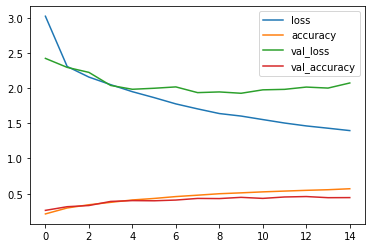

In [55]:
plt.plot(history_df)
plt.legend(history_df.columns)

In [56]:
results = model.evaluate(X_test, y_hot_test, batch_size=32)

582/582 [==============================] - 29s 49ms/step - loss: 2.0693 - accuracy: 0.4493


## visualise predictions and results

In [38]:
y_pred = loaded_model.predict(X_test)

In [77]:
np.sort(y_pred[0])

array([0.00163114, 0.00165817, 0.00246306, 0.00269074, 0.00432287,
       0.00876712, 0.01007419, 0.01422631, 0.02006801, 0.02007988,
       0.02024243, 0.02397131, 0.02696779, 0.03017291, 0.03086413,
       0.03095991, 0.04839107, 0.04992136, 0.0572818 , 0.05764902,
       0.0686039 , 0.09311288, 0.11400625, 0.11815701, 0.14371672],
      dtype=float32)

In [39]:
y_pred.shape

(18612, 25)

In [40]:
y_pred_df = pd.DataFrame(y_pred)

In [41]:
columns = np.unique(y)

In [42]:
columns

array(['Acanthus mollis', 'Alisma plantago-aquatica',
       'Anacamptis pyramidalis', 'Antirrhinum majus', 'Arbutus unedo',
       'Argentina anserina', 'Athyrium filix-femina', 'Begonia evansiana',
       'Bougainvillea spectabilis', 'Brugmansia suaveolens',
       'Bryonia cretica', 'Carpobrotus edulis', 'Castanea sativa',
       'Centaurium erythraea', 'Cistus albidus',
       'Crocosmia x crocosmiiflora', 'Deutzia scabra',
       'Eucalyptus globulus', 'Gunnera tinctoria',
       'Hypericum androsaemum', 'Lagerstroemia indica',
       'Lilium bulbiferum', 'Magnolia grandiflora', 'Nelumbo nucifera',
       'Nymphaea alba'], dtype='<U26')

In [43]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1

In [44]:
rename_columns

{0: 'Acanthus mollis',
 1: 'Alisma plantago-aquatica',
 2: 'Anacamptis pyramidalis',
 3: 'Antirrhinum majus',
 4: 'Arbutus unedo',
 5: 'Argentina anserina',
 6: 'Athyrium filix-femina',
 7: 'Begonia evansiana',
 8: 'Bougainvillea spectabilis',
 9: 'Brugmansia suaveolens',
 10: 'Bryonia cretica',
 11: 'Carpobrotus edulis',
 12: 'Castanea sativa',
 13: 'Centaurium erythraea',
 14: 'Cistus albidus',
 15: 'Crocosmia x crocosmiiflora',
 16: 'Deutzia scabra',
 17: 'Eucalyptus globulus',
 18: 'Gunnera tinctoria',
 19: 'Hypericum androsaemum',
 20: 'Lagerstroemia indica',
 21: 'Lilium bulbiferum',
 22: 'Magnolia grandiflora',
 23: 'Nelumbo nucifera',
 24: 'Nymphaea alba'}

In [45]:
y_pred_df = y_pred_df.rename(columns = rename_columns)

In [79]:
y_pred_df.loc[0]

Acanthus mollis                    0.0931129
Alisma plantago-aquatica          0.00165817
Anacamptis pyramidalis              0.118157
Antirrhinum majus                   0.114006
Arbutus unedo                      0.0301729
Argentina anserina                0.00432287
Athyrium filix-femina             0.00876712
Begonia evansiana                 0.00269074
Bougainvillea spectabilis          0.0309599
Brugmansia suaveolens              0.0142263
Bryonia cretica                    0.0686039
Carpobrotus edulis                 0.0239713
Castanea sativa                     0.020068
Centaurium erythraea               0.0572818
Cistus albidus                      0.143717
Crocosmia x crocosmiiflora         0.0100742
Deutzia scabra                     0.0483911
Eucalyptus globulus                0.0269678
Gunnera tinctoria                 0.00163114
Hypericum androsaemum             0.00246306
Lagerstroemia indica                0.057649
Lilium bulbiferum                  0.0202424
Magnolia g

In [47]:
y_pred_df['pred_species'] = y_pred_df.idxmax(axis=1)

In [49]:
y_pred_df['pred_species']

0                    Cistus albidus
1                   Acanthus mollis
2              Magnolia grandiflora
3                   Bryonia cretica
4             Athyrium filix-femina
                    ...            
18607               Acanthus mollis
18608             Antirrhinum majus
18609     Bougainvillea spectabilis
18610               Bryonia cretica
18611    Crocosmia x crocosmiiflora
Name: pred_species, Length: 18612, dtype: object

In [50]:
y_true_df = pd.DataFrame(y_hot_test).rename(columns = rename_columns)

In [51]:
y_true_df['true_species'] = y_true_df.idxmax(axis=1)

In [52]:
prediction_review = (y_pred_df['pred_species'] == y_true_df['true_species'])

In [59]:
prediction_review.count()

18612

In [36]:
prediction_vec_df = y_pred_df[['pred_species']].copy()
prediction_vec_df['true_species'] = y_true_df['true_species'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_species'] == y_true_df['true_species'])

In [146]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

,pred_species,true_species,result,false,true,angle
0,Cistus albidus,Cistus albidus,True,0,1,leaf
1,Acanthus mollis,Acanthus mollis,True,0,1,flower


In [38]:
true_pos_neg = prediction_vec_df.groupby('true_species').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [39]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [40]:
success_ratio

,percent_true
true_species,
Anacamptis pyramidalis,72.0
Crocosmia x crocosmiiflora,63.0
Acanthus mollis,58.0
Antirrhinum majus,58.0
Lilium bulbiferum,58.0
Cistus albidus,57.0
Nymphaea alba,56.0
Centaurium erythraea,48.0
Bryonia cretica,46.0


<AxesSubplot:xlabel='true_species'>

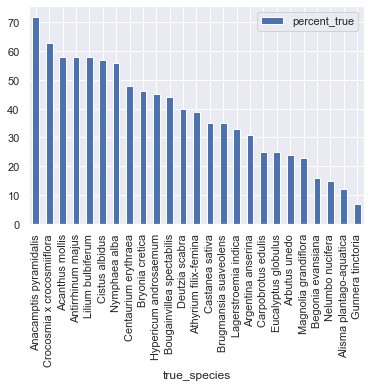

In [158]:
success_ratio.plot.bar()


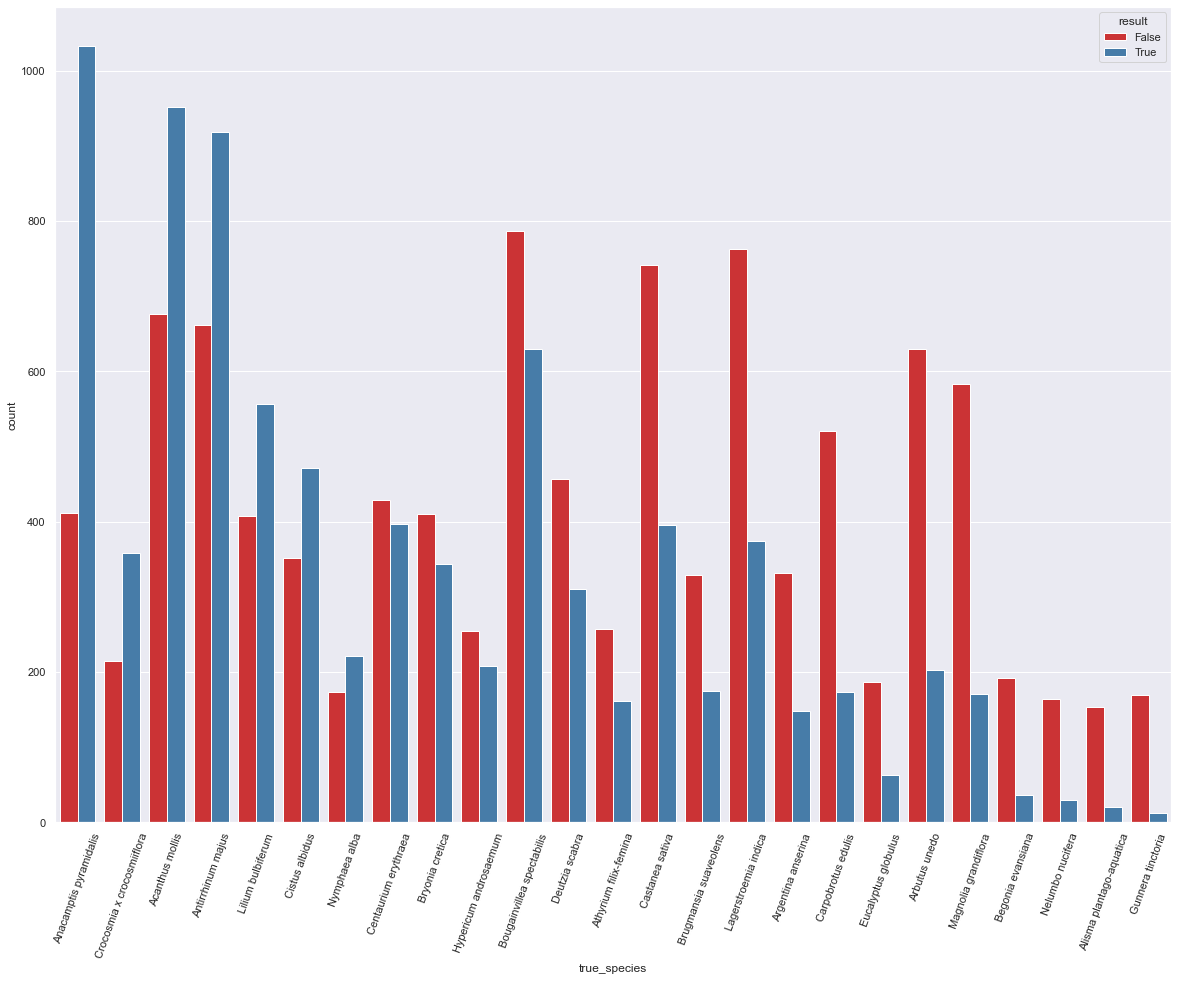

In [189]:
plt.figure(figsize=(20,15))
chart = sns.countplot(
    x="true_species", data=prediction_vec_df,
    palette='Set1', hue='result', order=success_ratio.index)
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

/Users/clementchausserie-lapree/.pyenv/versions/3.7.7/envs/bumbulb/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


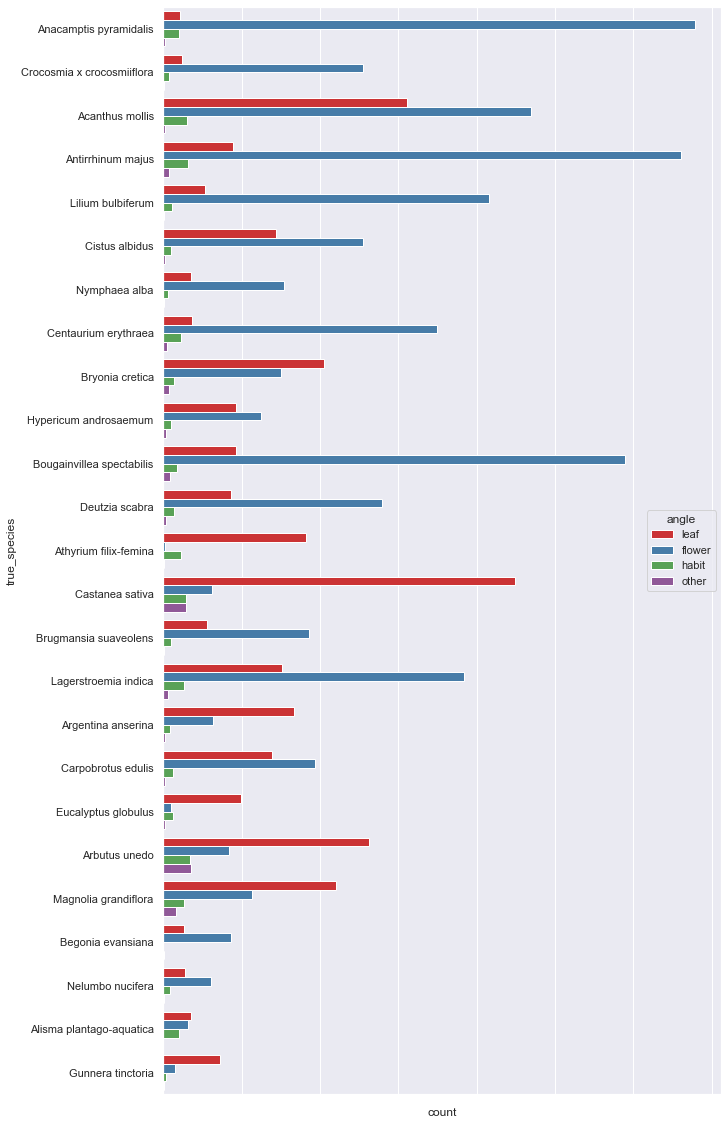

In [198]:
plt.figure(figsize=(10,20))
chart = sns.countplot(
    y="true_species", data=prediction_vec_df,
    palette='Set1', hue='angle', order=success_ratio.index)
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

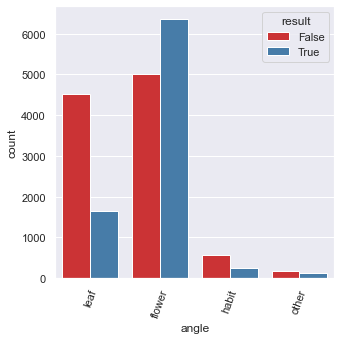

In [195]:
plt.figure(figsize=(5,5))
chart = sns.countplot(
    x="angle", data=prediction_vec_df,
    palette='Set1', hue='result')
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

## review confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix


In [152]:
cols = np.unique(y)
cols = [s + '_pred' for s in cols]

In [115]:
cm = confusion_matrix(y_true_df['true_species'], y_pred_df['pred_species'])
df = pd.DataFrame(cm, columns=cols)
df['species'] = cols
df.head(3)

,Acanthus mollis_pred,Alisma plantago-aquatica_pred,Anacamptis pyramidalis_pred,Antirrhinum majus_pred,Arbutus unedo_pred,Argentina anserina_pred,Athyrium filix-femina_pred,Begonia evansiana_pred,Bougainvillea spectabilis_pred,Brugmansia suaveolens_pred,...,Deutzia scabra_pred,Eucalyptus globulus_pred,Gunnera tinctoria_pred,Hypericum androsaemum_pred,Lagerstroemia indica_pred,Lilium bulbiferum_pred,Magnolia grandiflora_pred,Nelumbo nucifera_pred,Nymphaea alba_pred,species
0,951,15,3,83,33,28,14,4,5,21,...,88,7,4,3,16,8,41,1,11,Acanthus mollis_pred
1,12,21,2,17,8,4,7,1,0,7,...,2,8,1,3,2,3,9,1,14,Alisma plantago-aquatica_pred
2,36,3,1033,122,4,4,7,0,44,4,...,13,1,0,3,38,11,0,3,6,Anacamptis pyramidalis_pred


In [125]:
mask = success_ratio.loc[success_ratio['percent_true'] <= 40].index
mask = [s + '_pred' for s in mask]

In [132]:
lowest_perf_cm = df[mask].copy()
lowest_perf_cm['species'] = cols
lowest_perf_cm = lowest_perf_cm.set_index('species')
lowest_perf_cm.head()

,Deutzia scabra_pred,Athyrium filix-femina_pred,Castanea sativa_pred,Brugmansia suaveolens_pred,Lagerstroemia indica_pred,Argentina anserina_pred,Carpobrotus edulis_pred,Eucalyptus globulus_pred,Arbutus unedo_pred,Magnolia grandiflora_pred,Begonia evansiana_pred,Nelumbo nucifera_pred,Alisma plantago-aquatica_pred,Gunnera tinctoria_pred
species,,,,,,,,,,,,,,
Acanthus mollis_pred,88,14,92,21,16,28,11,7,33,41,4,1,15,4
Alisma plantago-aquatica_pred,2,7,13,7,2,4,4,8,8,9,1,1,21,1
Anacamptis pyramidalis_pred,13,7,4,4,38,4,13,1,4,0,0,3,3,0
Antirrhinum majus_pred,21,12,33,9,56,22,16,10,7,23,27,16,8,2
Arbutus unedo_pred,14,7,93,48,23,13,18,17,203,54,5,4,15,2


In [52]:
angle_new = bumbulb_images['angle']

In [53]:
ignore_X_train, ignore_X_test, angle_train, angle_test = train_test_split(X, angle_new, test_size = 0.3, random_state=1)

In [67]:
prediction_vec_df['angle'] = angle_test.reset_index()['angle']

In [69]:
prediction_vec_df.head(3)

,pred_species,true_species,result,false,true,angle
0,Cistus albidus,Cistus albidus,True,0,1,leaf
1,Acanthus mollis,Acanthus mollis,True,0,1,flower
2,Magnolia grandiflora,Brugmansia suaveolens,False,1,0,flower


In [138]:
angle_performance = prediction_vec_df.drop(columns=['result', 'true_species', 'pred_species']).groupby('angle').sum()
angle_performance['success_rate'] = round((angle_performance['true'] / (angle_performance['false'] + angle_performance['true']))*100)
angle_performance

,false,true,success_rate
angle,,,
flower,4997,6354,56.0
habit,564,250,31.0
leaf,4525,1640,27.0
other,163,119,42.0


# Select augmentation angle

Look at the success rate by angle for each species

In [211]:
species_angle_success_rate = prediction_vec_df.groupby(['true_species', 'angle']).sum()
species_angle_success_rate['success_rate'] = round((species_angle_success_rate['true'] / (species_angle_success_rate['true'] + species_angle_success_rate['false']))*100)
species_angle_success_rate = species_angle_success_rate.drop(columns = ['false','true'])

In [213]:
species_angle_success_rate.head()

result  success_rate
true_species             angle                       
Acanthus mollis          flower     652          70.0
                         habit       34          56.0
                         leaf       263          42.0
                         other        2          40.0
Alisma plantago-aquatica flower       5           8.0

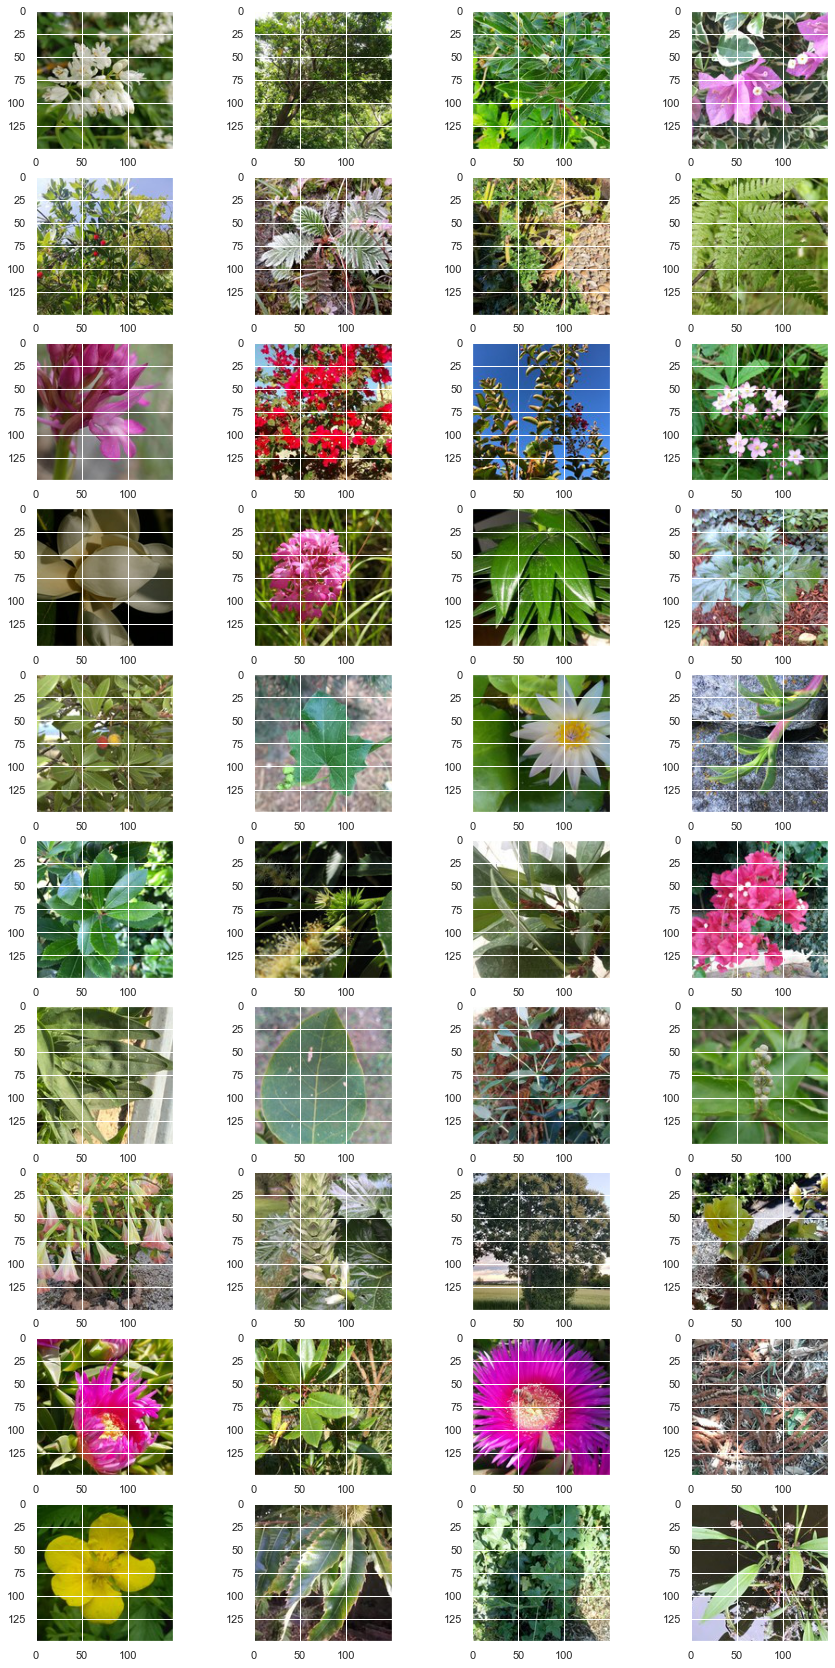

In [254]:
false_index = prediction_vec_df.index[prediction_vec_df['result'] == False].tolist()[-40:]

w=10
h=10
fig=plt.figure(figsize=(15, 30))
columns = 4
rows = 10
position = 1
for i in false_index:
    img = X_test[i]
    fig.add_subplot(rows, columns, position)
    plt.imshow(img)
    position += 1
plt.show()

# Preprocess X with the same approach than VGG16



In [255]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [257]:
# X_train_pp = preprocess_input(X_train)
# X_test_pp = preprocess_input(X_test)

# Care requirements

In [134]:
care_df = pd.read_csv('/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/df_species_care.csv')

In [139]:
care_df.head(1)

,Scientific names,Common names,Genuses,Families,Description,Foliage,Flower,Light,ph,Moisture,Soil,Ultimate \nHeight,Ultimate \nSpread,How to Grow,How to Care
0,Acanthus mollis,bear's breech,Acanthus,Acanthaceae,"Acanthus mollis, commonly known as bear's bree...",Deciduous,White,Medium sun,"Acid, Alkaline, Neutral",Well-Drained,"Chalk, Loam, Sand",1 - 1.5 meters,1 - 1.5 meters,The ideal soil is a deep fertile well drained ...,Pruning: Cut down old flower stems


# VGG16

In [258]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model

In [259]:
model = load_model()
model.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [264]:
def update_model(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    # Add layers to the mdoel
    flatten_layer = Flatten()
    dense_layer = Dense(500, activation='relu')
    prediction_layer = Dense(25, activation='softmax')

    model = Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    
    return model

In [265]:
model = update_model(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               4096500   
_________________________________________________________________
dense_3 (Dense)              (None, 25)                12525     
Total params: 18,823,713
Trainable params: 4,109,025
Non-trainable params: 14,714,688
_________________________________________________________________


In [268]:
def compile_model(model):
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [269]:
def build_model():
    
    model = load_model()
    model = update_model(model)
    model = compile_model(model)
    
    return model

model = build_model()

In [271]:
X_train_vg = preprocess_input(X_train) 
X_test_vg = preprocess_input(X_test)

In [276]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train_vg, y_hot_train, 
                    validation_split=0.3, 
                    epochs=10, 
                    batch_size=16, 
                    callbacks=[es])

KeyboardInterrupt: 